In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
data = pd.read_csv("../databases/PEPSIR_raw_LF_perfect.csv", sep=";")

In [3]:
data.head()

,river,day,reach,lon,lat,flowacc,sinuosity,meandwave,height,W,...,S,dA,K,A0,Abar,alpha,beta,Fr,U,Q
0,Connecticut,1,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,26.306667,475.403333,...,0.001768,541.200050,12.808404,515.403333,821.447783,10.945707,0.225114,0.217360,0.965178,922.263333
1,Connecticut,2,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.960000,443.906667,...,0.001606,381.870528,12.586607,515.403333,821.447783,10.945707,0.225114,0.165027,0.704906,581.980000
2,Connecticut,3,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.810000,427.006667,...,0.001539,316.600322,12.513133,515.403333,821.447783,10.945707,0.225114,0.141175,0.595232,460.586667
3,Connecticut,4,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.776667,423.786667,...,0.001521,302.424628,12.499948,515.403333,821.447783,10.945707,0.225114,0.135371,0.569428,435.253333
4,Connecticut,5,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.616667,406.016667,...,0.001469,236.099400,12.410309,515.403333,821.447783,10.945707,0.225114,0.113845,0.471288,334.273333


# Computation of $\alpha$ and $\beta$ Strickler power law parameters using the Low-Froude model

In [23]:
# Get data for GaronneUpstream river section
river_data = data[data["river"] == "MissouriDownstream"]

In [24]:
# Get data for 1st reach of GaronneUpstream river section
reach_data = river_data[river_data["reach"] == 1]

In [25]:
display(reach_data)

,river,day,reach,lon,lat,flowacc,sinuosity,meandwave,height,W,...,S,dA,K,A0,Abar,alpha,beta,Fr,U,Q
30500,MissouriDownstream,1,1,-95.518982,40.248444,1060505.625,1.039897,4400.90918,277.899571,238.263953,...,0.000165,463.053815,35.517881,381.595718,879.243082,48.319689,-0.243216,0.166838,0.983876,831.037565
30501,MissouriDownstream,2,1,-95.518982,40.248444,1060505.625,1.039897,4400.90918,277.993541,239.284541,...,0.000166,485.499500,35.328601,381.595718,879.243082,48.319689,-0.243216,0.168188,1.002793,869.539012
30502,MissouriDownstream,3,1,-95.518982,40.248444,1060505.625,1.039897,4400.90918,278.150112,240.322576,...,0.000168,523.051743,35.002834,381.595718,879.243082,48.319689,-0.243216,0.170537,1.036347,937.572182
30503,MissouriDownstream,4,1,-95.518982,40.248444,1060505.625,1.039897,4400.90918,278.241565,240.796112,...,0.000167,545.051648,34.815479,381.595718,879.243082,48.319689,-0.243216,0.170908,1.050127,973.150229
30504,MissouriDownstream,5,1,-95.518982,40.248444,1060505.625,1.039897,4400.90918,278.315482,241.151571,...,0.000167,562.864101,34.667045,381.595718,879.243082,48.319689,-0.243216,0.171548,1.063357,1004.354294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31090,MissouriDownstream,591,1,-95.518982,40.248444,1060505.625,1.039897,4400.90918,278.509212,242.028747,...,0.000167,609.668760,34.291776,381.595718,879.243082,48.319689,-0.243216,0.173032,1.096822,1087.315471
31091,MissouriDownstream,592,1,-95.518982,40.248444,1060505.625,1.039897,4400.90918,278.564059,242.243500,...,0.000168,622.949233,34.188271,381.595718,879.243082,48.319689,-0.243216,0.173937,1.109437,1114.563529
31092,MissouriDownstream,593,1,-95.518982,40.248444,1060505.625,1.039897,4400.90918,278.638847,242.542747,...,0.000167,641.077209,34.050108,381.595718,879.243082,48.319689,-0.243216,0.173955,1.118827,1144.279588
31093,MissouriDownstream,594,1,-95.518982,40.248444,1060505.625,1.039897,4400.90918,278.554247,242.204835,...,0.000167,620.572588,34.206665,381.595718,879.243082,48.319689,-0.243216,0.173388,1.104711,1107.187471


In [26]:
# Get variables and compute terms in Low-Froude equation (r=1 in this case)
A0r = reach_data["A0"]
dArp = reach_data["dA"]
Qrp = reach_data["Q"]
Srp = reach_data["S"]
Wrp = reach_data["W"]
Zrp = reach_data["height"]
Zr0 = np.min(Zrp)
Wr0 = np.min(Wrp)
c1rp = Wrp**(-2./5.) * Srp**(3./10.)
c2rp = c1rp * dArp
c3rp = (Zrp - Zr0)
c4r = 1.0 / Wr0
print(Wrp)

30500    238.263953
30501    239.284541
30502    240.322576
30503    240.796112
30504    241.151571
            ...    
31090    242.028747
31091    242.243500
31092    242.542747
31093    242.204835
31094    242.548106
Name: W, Length: 595, dtype: float64


Rewriting the Low-Froude equation as:
$\frac{Q^{3/5}}{c^{(1)}_{r,p} A_{0,r} + c^{(2)}_{r,p}} = \alpha_r^{3/5} \left( c^{(4)}_{r,p} A_{0,r} + c^{(3)}_{r,p} \right)^{3/5 \beta_r}$
<br>
And setting $x=\left( c^{(4)}_{r,p} A_{0,r} + c^{(3)}_{r,p} \right)$, $y=\frac{Q^{3/5}}{c^{(1)}_{r,p} A_{0,r} + c^{(2)}_{r,p}}$, $a=\alpha_r^{3/5}$ and $b=3/5 \beta_r$,
The Low-Froude equation is then: $y=a x^b$
<br>
It is then easy to find a and b, using a linear regression between $\ln(y)$ and $\ln(x)$ and consequently the values of $\alpha$ and $\beta$


In [27]:
# Compute linear regression between log(x) and log(y)
x = c4r * A0r + c3rp
y = Qrp**(3./5.) / (c1rp * A0r + c2rp)
print(x,y)
res = linregress(np.log(x), np.log(y))
                 
# Compute alpha and beta
a = res.slope
b = res.intercept
alpha = np.exp(b)**(5./3.)
beta = a * 5. / 3.
print("alpha=", alpha)
print("beta =", beta)

30500    4.079801
30501    4.173771
30502    4.330342
30503    4.421795
30504    4.495712
           ...   
31090    4.689442
31091    4.744289
31092    4.819077
31093    4.734477
31094    4.820318
Length: 595, dtype: float64 30500    8.140930
30501    8.147795
30502    8.155461
30503    8.162784
30504    8.166760
           ...   
31090    8.172513
31091    8.173378
31092    8.174909
31093    8.174293
31094    8.182633
Length: 595, dtype: float64
alpha= 24.163294528926127
beta = 0.22208092356740003


In [31]:
print(reach_data)

                    river  day  reach        lon        lat      flowacc  \
30500  MissouriDownstream    1      1 -95.518982  40.248444  1060505.625   
30501  MissouriDownstream    2      1 -95.518982  40.248444  1060505.625   
30502  MissouriDownstream    3      1 -95.518982  40.248444  1060505.625   
30503  MissouriDownstream    4      1 -95.518982  40.248444  1060505.625   
30504  MissouriDownstream    5      1 -95.518982  40.248444  1060505.625   
...                   ...  ...    ...        ...        ...          ...   
31090  MissouriDownstream  591      1 -95.518982  40.248444  1060505.625   
31091  MissouriDownstream  592      1 -95.518982  40.248444  1060505.625   
31092  MissouriDownstream  593      1 -95.518982  40.248444  1060505.625   
31093  MissouriDownstream  594      1 -95.518982  40.248444  1060505.625   
31094  MissouriDownstream  595      1 -95.518982  40.248444  1060505.625   

       sinuosity   meandwave      height           W  ...         S  \
30500   1.039897

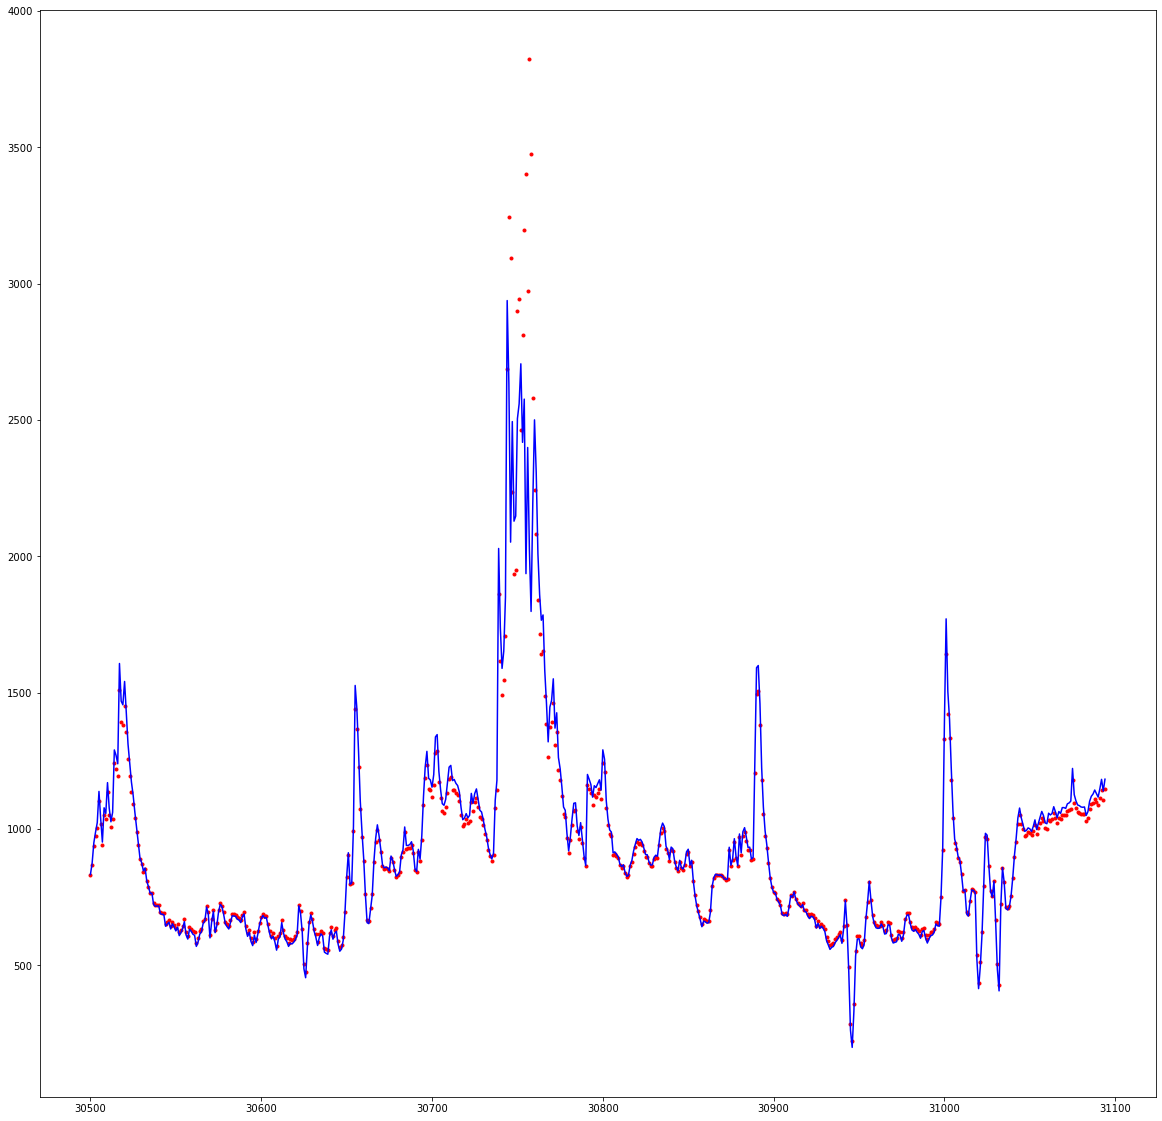

In [29]:
# Check our estimation using the Low-Froude model and computed values of alpha and beta
Qest = (alpha**(3./5.) * (c1rp * A0r + c2rp) * (c4r * A0r + c3rp)**(3./5. * beta))**(5./3.)
plt.figure(figsize=(20,20))
plt.plot(Qrp, 'r.')

plt.plot(Qest, 'b-')

# Useful metrics

## Standard metrics

- Pearson correlation coefficient $R2(y) = \frac{\sum_{i=1}^{n}(y^{est}_i - \bar y^{est}) (y^{obs}_i - \bar y^{obs})} {\left(\sum_{i=1}^{n}(y^{est}_i - \bar y^{est})^2\right)^{1/2}\left(\sum_{i=1}^{n}(y^{obs}_i - \bar y^{obs})^2\right)^{1/2}}$
<br>
<br>
- Root Mean Square Error $RMSE(y) = \sqrt {\frac{1}{n} \left( \sum^n_{i=1}(y^{est}_i - y^{obs}_i)^2 \right)}$
<br>
<br>

## Other useful metrics in hydrology (hence for discharge values mainly/only)

- Normalized Root Mean Square Error $nRMSE(y) = \frac{RMSE(y)} {\bar y^{obs}}$
<br>
<br>
- Nash-Sutcliffe model Efficiency $NSE(y) = 1 - \frac{\sum^n_{i=1}(y^{est}_i - y^{obs}_i)^2} {\sum^n_{i=1}(y^{obs}_i - \bar y^{obs})^2}$
<br>
<br>
- Kling-Gupta model Efficiency $KGE(y) = 1 - \sqrt {(\beta_{KG}-1)^2+(\alpha_{KG}-1)^2+(R^2-1)^2}$, with $\beta_{KG}=\frac{\bar y^{est}}{\bar y^{obs}}$ and $\alpha_{KG} = \frac{\sigma(y^{est})}{\sigma(y^{obs})}$